In [120]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [11]:
df_raw = pd.read_pickle('USGS_raw_data.pickle')
df = df_raw.dropna(axis=1, thresh=365*5)
stations = pd.read_pickle('USGS_stations.pickle')
len(df)

2192

In [255]:
def plotfit(X,y,lr):
    
    plt.subplots(figsize=(10,10))
    
    ax = plt.subplot(2,1,1)
    plt.plot(y,'k.',alpha=0.8)
    plt.plot(pd.Series(lr.predict(X),index=y.index),'c.',alpha=0.8)
    ax.set_xlabel('year',fontsize=12)
    ax.set_ylabel('log(turbidity)',fontsize=12)
    ax.legend(['measured','predicted'],fontsize=12)
    ax.set_title('Time Series Plot',fontweight='bold')
    
    ax = plt.subplot(2,2,3)
    plt.scatter(lr.predict(X),y,alpha=0.3,color='black')
    plt.plot([3,5],[3,5],'w--',alpha=0.7,linewidth=3)
    ax.set_xlabel('measured turbidity (log)',fontsize=12)
    ax.set_ylabel('predicted turbidity (log)',fontsize=12)
    ax.set_title('Measured vs. Predicted',fontweight='bold')

    ax = plt.subplot(2,2,4)
    ax.set_title('Residual Histogram',fontweight='bold')
    ax.set_xlabel('residual',fontsize=12)
    ax.set_ylabel('count',fontsize=12)
    plt.hist(lr.predict(X)-y,bins=20,color='#999999');

### Basic fit with all (113) stations

113
0.795497681407


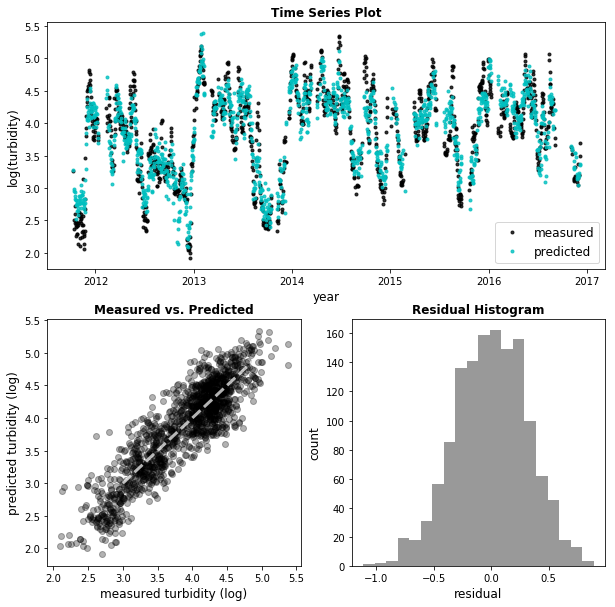

In [256]:
# --- apply ordinary linear regression on all stations

data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
X = data.drop(['turbidity'],axis=1)
y = data['turbidity']

lr = LinearRegression()
lr.fit(X,y)
print(len(X.columns))
print(lr.score(X,y))
plotfit(X,y,lr)

In [212]:
Xsm = sm.add_constant(X)
# Create your model and
# Fit your model to your training set
smfit = sm.OLS(y,Xsm).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              turbidity   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     42.86
Date:                Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                        01:52:52   Log-Likelihood:                -366.35
No. Observations:                1359   AIC:                             960.7
Df Residuals:                    1245   BIC:                             1555.
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.4827      4.626     -8.102      0.000     -46.558     -28.407
02111500       0.0306      0.026      1.196      0.232      -0.020       0.081
03086000       0.0403      0.070      0.575      0.565      -0.097       0.178
03110685       0.4124      0.582      0.709      0.478      -0.729       1.553
03110690       0.8278      1.211      0.683      0.495      -1.549       3.204
03111515      -0.4009      1.166     -0.344      0.731      -2.689       1.887
03111520      -1.2142      1.258     -0.965      0.335      -3.683       1.255
03112500      -0.4267      1.101     -0.388      0.698      -2.587       1.733
03114275       0.1004      1.301      0.077      0.938      -2.451       2.652
03114280       0.6054      0.585      1.035      0.301      -0.542       1.753
03150700      -0.1329      0.451     -0.294      0.769      -1.018       0.753
03277200      -0.0652      0.050     -1.296      0.195      -0.164       0.033
03283500      -0.0857      0.019     -4.459      0.000      -0.123      -0.048
03294600       0.1853      0.098      1.890      0.059      -0.007       0.378
03303280       0.0735      0.054      1.357      0.175      -0.033       0.180
03381700      -0.2019      0.041     -4.950      0.000      -0.282      -0.122
03404000       0.0074      0.079      0.094      0.925      -0.147       0.162
03404500      -0.0027      0.082     -0.033      0.973      -0.164       0.158
03430250       1.4047      0.671      2.093      0.037       0.088       2.721
03430320      -0.6054      4.962     -0.122      0.903     -10.341       9.130
03431091      -3.8455      6.294     -0.611      0.541     -16.194       8.503
03431500      -0.0911      0.076     -1.201      0.230      -0.240       0.058
03431712       3.8865      1.823      2.132      0.033       0.311       7.462
03436100       0.0792      0.020      3.881      0.000       0.039       0.119
03594500       1.8044      0.519      3.476      0.001       0.786       2.823
04077630       0.0406      0.055      0.738      0.461      -0.067       0.149
04112500       0.0986      0.026      3.795      0.000       0.048       0.150
04126740      -0.0581      0.098     -0.592      0.554      -0.250       0.134
05051500      -0.1299      0.063     -2.047      0.041      -0.254      -0.005
05051522       0.3787      0.109      3.472      0.001       0.165       0.593
05054000      -0.3671      0.095     -3.865      0.000      -0.553      -0.181
05064500       0.4656      0.091      5.128      0.000       0.287       0.644
05079000      -0.0634      0.094     -0.674      0.501      -0.248       0.121
05080000       0.0864      0.104      0.830      0.406      -0.118       0.290
05082500      -0.5131      0.124     -4.139      0.000      -0.756      -0.270
05092000       0.3318      0.112      2.965      0.003       0.112       0.551
05

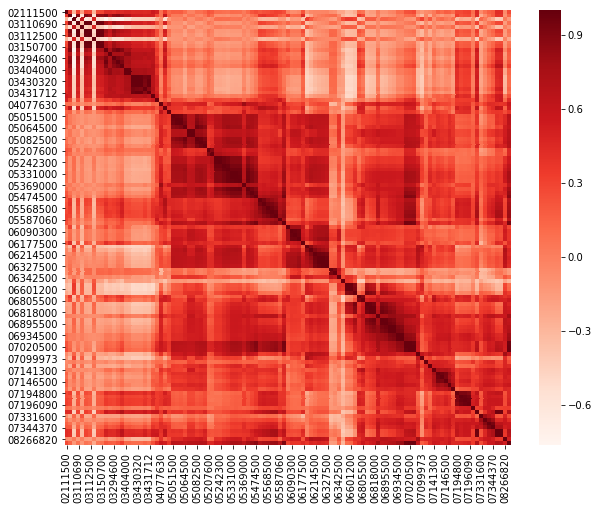

In [257]:
plt.subplots(figsize=(10,8))
sns.heatmap(X.corr(),cmap='Reds')

#### Kfold cross-validation: shuffle makes big difference 

In [260]:
# --- cross validation with 6-folds
# w/shuffle shows significantly different outcome
# model does not perform well with out-of-sample data
from sklearn.cross_validation import cross_val_score

data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

# # shuffle data
# data = data.sample(frac=1) 

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']

lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=6, scoring='r2')
print(scores)
print(scores.mean())
print(scores.var())

[ 0.27170071 -0.36518423  0.29233739 -0.91657212 -0.17072212 -1.72966113]
-0.436350252409
0.501868469619


-1.70256579289


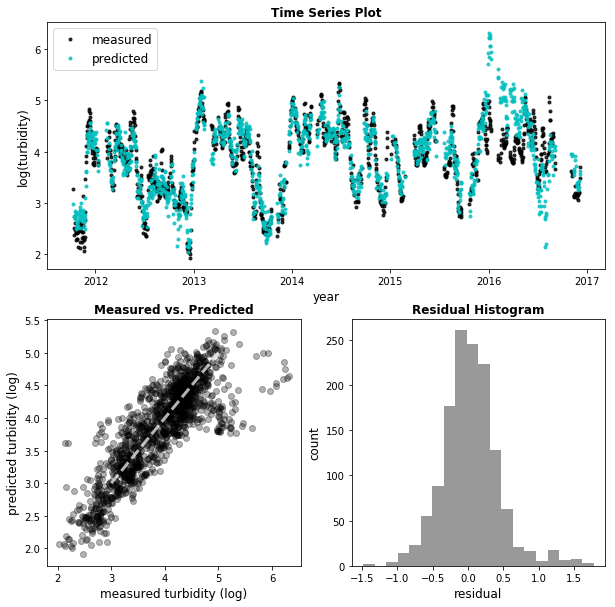

In [261]:
# --- show example of bad out-of-sample prediction
# using year 1-5 to predict year 6 (worst in cross_val_score)
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

# data = data.sample(frac=1)

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']

n = 1359-227
X_train = X.iloc[:n,:]
y_train = y[:n]
X_test = X.iloc[n:,]
y_test = y[n:]

lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
plotfit(X,y,lr)

### Try LassoCV

#### How to make more robust out-of-sample prediction

In [262]:
# --- apply LassoCV to all stations

scores = []
cvs = []
nums = []

alphas = np.logspace(-8,0,num=100)
for alpha in alphas:
    lcv = LassoCV(cv=6, alphas=[alpha])
    data = df.dropna().apply(np.log)
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.dropna(axis=1)
    X = data.drop(['turbidity'],axis=1)
    y = data['turbidity']
    lcv.fit(X,y)
    scores.append(lcv.score(X,y))
    abscoef = abs(lcv.coef_)
    # plt.bar(x=range(len(abscoef[abscoef>1e-10])),height = sorted(abscoef[abscoef>1e-10]))
    nums.append(len(abscoef[abscoef>1e-10]))
    
    cv_scores = cross_val_score(lcv, X, y, cv=6, scoring='r2')
    cvs.append(cv_scores.mean())

best alpha = 0.050941
best # of stations = 7
best cross-validation score = 0.260698


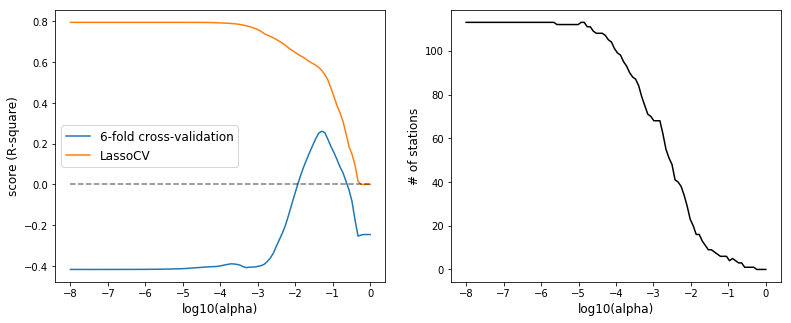

In [267]:
fig,ax = plt.subplots(1,2,figsize=(13,5))
ax = plt.subplot(1,2,1)
plt.plot(np.log10(alphas),cvs)
plt.plot(np.log10(alphas),scores)
plt.plot([-8,0],[0,0],'k--',alpha=0.5)
ax.set_xlabel('log10(alpha)',fontsize=12)
ax.set_ylabel('score (R-square)',fontsize=12)
plt.legend(['6-fold cross-validation','LassoCV'],fontsize=12)
ax = plt.subplot(1,2,2)
plt.plot(np.log10(alphas),nums,'k')
ax.set_xlabel('log10(alpha)',fontsize=12)
ax.set_ylabel('# of stations',fontsize=12)

alpha = alphas[np.array(cvs).argmax()]
num = nums[np.array(cvs).argmax()]
score = cvs[np.array(cvs).argmax()]

print('best alpha = %f'%alpha)
print('best # of stations = %d'%num)
print('best cross-validation score = %f'%score)

0.39226777732
[ 0.44521574  0.43368944  0.49940697 -0.52446267  0.32065631  0.38968368]
0.260698244931


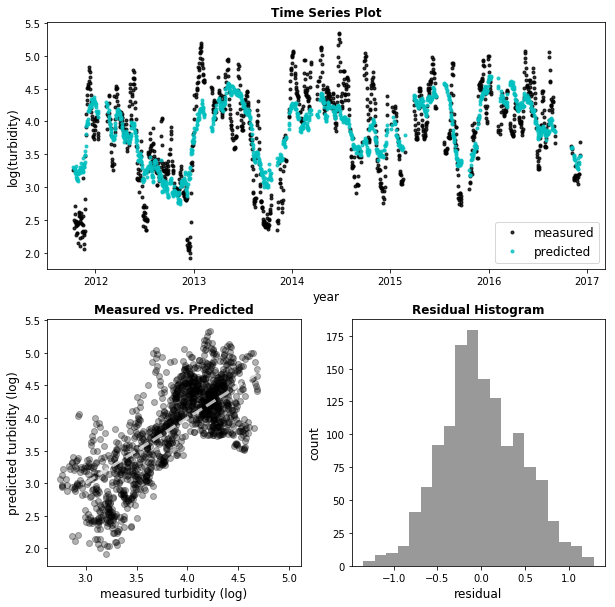

In [268]:
# --- visualize the best fit based on LassoCV
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
X = data.drop(['turbidity'],axis=1)
y = data['turbidity']

n = 1359-227
X_train = X.iloc[:n,:]
y_train = y[:n]
X_test = X.iloc[n:,]
y_test = y[n:]

# lr = LinearRegression()
# lr.fit(X_train,y_train)
# print(lr.score(X_test,y_test))
# plotfit(X,y,lr)

lr = Lasso(alpha=0.050941)
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
plotfit(X,y,lr)

# lr = LassoCV(cv=6, alphas=[0.050941])
# lr.fit(X_train,y_train)
# print(lr.score(X_test,y_test))
# plotfit(X,y,lr)

cv_scores = cross_val_score(lr, X, y, cv=6, scoring='r2')
print(cv_scores)
print(cv_scores.mean())

03436100                          RED RIVER AT PORT ROYAL, TN
05207600    MISSISSIPPI RIVER AT WILLOW BEACH AT BALL CLUB...
05211000                MISSISSIPPI RIVER AT GRAND RAPIDS, MN
05586100                    ILLINOIS RIVER AT VALLEY CITY, IL
07141300                         ARKANSAS R AT GREAT BEND, KS
07164500                          Arkansas River at Tulsa, OK
07344370                         Red River at Spring Bank, AR
07374525                Mississippi River at Belle Chasse, LA
Name: site_name, dtype: object


<Container object of 8 artists>

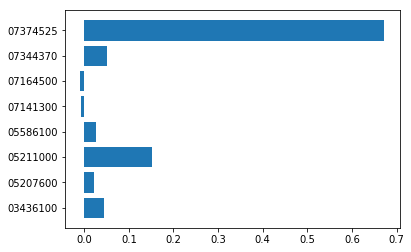

In [148]:
sta_list = X.columns[abs(lr.coef_)>1e-10]
print(stations.loc[sta_list,'site_name'])
plt.barh(y=sta_list,width=lr.coef_[abs(lr.coef_)>1e-10])


### Using recursive feature elimination

In [161]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE

alphas = np.logspace(-2,-1,num=9)
nums = range(1,15)
scores = np.zeros((len(alphas),len(nums)))

data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
X = data.drop(['turbidity'],axis=1)
y = data['turbidity']

for i in range(len(alphas)):
    for j in range(len(nums)):
        alpha = alphas[i]
        num = nums[j]
        
#         lr = LinearRegression()
        lr = Lasso(alpha=alpha)

        rfe = RFE(lr, num)
        rfe.fit(X, y)

        cv_scores = cross_val_score(rfe, X, y, cv=6, scoring='r2')
        scores[i,j] = cv_scores.mean()
        
        print('alpha=%f, num=%f, score=%f'%(alpha,num,scores[i,j]))

alpha=0.010000, num=1.000000, score=0.359938
alpha=0.010000, num=2.000000, score=0.349081
alpha=0.010000, num=3.000000, score=0.286490
alpha=0.010000, num=4.000000, score=0.256555
alpha=0.010000, num=5.000000, score=0.198207
alpha=0.010000, num=6.000000, score=0.171335
alpha=0.010000, num=7.000000, score=0.171504
alpha=0.010000, num=8.000000, score=0.159309
alpha=0.010000, num=9.000000, score=0.129354
alpha=0.010000, num=10.000000, score=0.081008
alpha=0.010000, num=11.000000, score=0.008753
alpha=0.010000, num=12.000000, score=-0.017392
alpha=0.010000, num=13.000000, score=-0.010820
alpha=0.010000, num=14.000000, score=-0.014648
alpha=0.013335, num=1.000000, score=0.361638
alpha=0.013335, num=2.000000, score=0.393948
alpha=0.013335, num=3.000000, score=0.303384
alpha=0.013335, num=4.000000, score=0.257737
alpha=0.013335, num=5.000000, score=0.200299
alpha=0.013335, num=6.000000, score=0.189960
alpha=0.013335, num=7.000000, score=0.176092
alpha=0.013335, num=8.000000, score=0.121593
al

In [162]:
#scores.tofile('grid_scores.pickle')

ValueError: not enough values to unpack (expected 2, got 1)

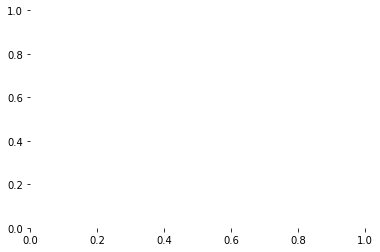

In [283]:

ax = sns.heatmap(scores,cmap='Greens',xticklabels=nums,yticklabels=alphas)
ax.set_xlabel('# of stations', fontsize=12)
ax.set_ylabel('alpha', fontsize=12)
ax.set_title('6-Fold Cross Validation Score')

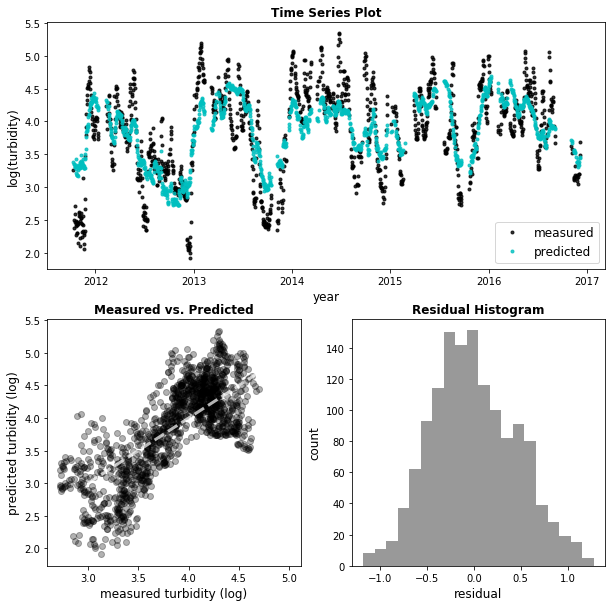

In [269]:
alpha = 0.031623
num = 2
        
lr = Lasso(alpha=alpha)

rfe = RFE(lr, num)
rfe.fit(X, y)
plotfit(X,y,rfe)

In [180]:
print(stations.loc[X.columns[rfe.support_],'site_name'])
print(rfe.get_support)

05207600    MISSISSIPPI RIVER AT WILLOW BEACH AT BALL CLUB...
07374525                Mississippi River at Belle Chasse, LA
Name: site_name, dtype: object
<bound method SelectorMixin.get_support of RFE(estimator=Lasso(alpha=0.031623, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
  n_features_to_select=2, step=1, verbose=0)>


In [190]:
# --- cross validation with 6-folds
# w/shuffle shows significantly different outcome
# model does not perform well with out-of-sample data
from sklearn.cross_validation import cross_val_score

group = list(X.columns[rfe.support_])
group.append('turbidity')

data = df[group].dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

# # shuffle data
# data = data.sample(frac=1) 

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']

lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=6, scoring='r2')

# alphas = np.logspace(-8,0,num=100)
# lcv = LassoCV(cv=6, alphas=alphas)
# scores = cross_val_score(lcv, X, y, cv=6, scoring='r2')

print(scores)
print(scores.mean())

[ 0.47576523  0.48378203  0.65807456  0.30948714  0.43054452  0.13173646]
0.414898321798


In [188]:
list(group)

['05207600', '07374525']

### Try LassoCV with RFE selected 20 stations using LR( )

In [271]:
# --- apply LassoCV to RFE selected stations

from sklearn.feature_selection import RFE

lr = LinearRegression()
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
# data = df.dropna().apply(np.log)
# data = data.replace([np.inf, -np.inf], np.nan)
# data = data.dropna(axis=1)

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']

nums = range(1,113)
scores = []
for i in range(len(nums)):
    # create the RFE model and select 10 attributes
    lr = LinearRegression()
    rfe = RFE(lr, nums[i])
    rfe = rfe.fit(X, y)
#     print(rfe.score(X,y))
    scores.append(rfe.score(X,y))



Text(0.5,1,'Recursive Feature Selection')

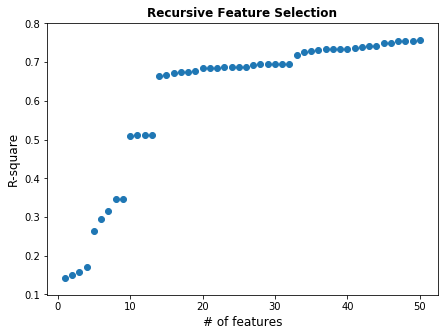

In [282]:
fig,ax = plt.subplots(1,1,figsize=(7,5))
plt.scatter(nums[:50],scores[:50])
ax.set_xlabel('# of features',fontsize=12)
ax.set_ylabel('R-square',fontsize=12)
ax.set_title('Recursive Feature Selection',fontweight='bold')


In [203]:
rfe = RFE(lr, 15)
rfe = rfe.fit(X, y)
print(rfe.score(X,y))

cols = X.columns[rfe.support_]
group = list(cols)
group.append('turbidity')

scores = []
cvs = []
nums = []

alphas = np.logspace(-8,-1,num=100)
for alpha in alphas:
    lcv = LassoCV(cv=6, alphas=[alpha])
    data = df[group].dropna().apply(np.log)
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.dropna(axis=1)
    X = data.drop(['turbidity'],axis=1)
    y = data['turbidity']
    lcv.fit(X,y)
    scores.append(lcv.score(X,y))
    abscoef = abs(lcv.coef_)
    # plt.bar(x=range(len(abscoef[abscoef>1e-10])),height = sorted(abscoef[abscoef>1e-10]))
    nums.append(len(abscoef[abscoef>1e-10]))
    
    cv_scores = cross_val_score(lcv, X, y, cv=6, scoring='r2')
    cvs.append(cv_scores.mean())

0.654939251906


best alpha = 0.000000
best # of stations = 15
best cross-validation score = 0.432420


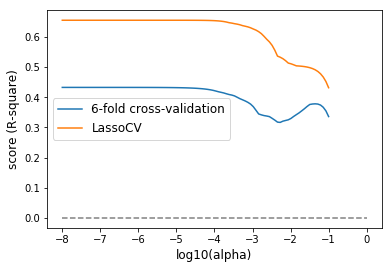

In [204]:
fig,ax = plt.subplots(1,1)
plt.plot(np.log10(alphas),cvs)
plt.plot(np.log10(alphas),scores)
plt.plot([-8,0],[0,0],'k--',alpha=0.5)
ax.set_xlabel('log10(alpha)',fontsize=12)
ax.set_ylabel('score (R-square)',fontsize=12)
plt.legend(['6-fold cross-validation','LassoCV'],fontsize=12)
alpha = alphas[np.array(cvs).argmax()]
num = nums[np.array(cvs).argmax()]
score = cvs[np.array(cvs).argmax()]

print('best alpha = %f'%alpha)
print('best # of stations = %d'%num)
print('best cross-validation score = %f'%score)

03110690      OHIO R AT NEW CUMBERLAND LOCK & DAM (LOWER), OH
03111520         OHIO R AT PIKE ISLAND LOCK & DAM (LOWER), WV
03430250    CUMBERLAND RIVER AT STONES RIVER NEAR HERMITAG...
03430320     CUMBERLAND RIVER AT BRILEY PKWY NR INGLEWOOD, TN
03431712     CUMBERLAND RIVER AT BRILEY PKWY AT COCKRILL BEND
03594500                  TENNESSEE RIVER AT PERRYVILLE, TENN
06090300                   Missouri River near Great Falls MT
06090800                     Missouri River at Fort Benton MT
06342020                          MISSOURI RIVER AT PRICE, ND
06441595              MISSOURI R AT FARM ISLAND NR PIERRE, SD
06813500                           Missouri River at Rulo, NE
06818000                     Missouri River at St. Joseph, MO
07022000                      Mississippi River at Thebes, IL
07374000                 Mississippi River at Baton Rouge, LA
07020850              Mississippi River at Cape Girardeau, MO
Name: site_name, dtype: object
[ 0.51001925  0.585242    0.65309314  0

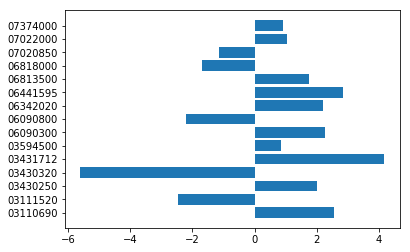

In [210]:
lcv = LassoCV(cv=6, alphas=[0])
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
data = data[group]
X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lcv.fit(X,y)
sta_list = X.columns[abs(lcv.coef_)>1e-10]
print(stations.loc[sta_list,'site_name'])
plt.barh(y=sta_list,width=lcv.coef_[abs(lcv.coef_)>1e-10])

scores = cross_val_score(lcv, X, y, cv=6, scoring='r2')
print(scores)
print(scores.mean())

#### <font color='red'> keep the print out below for reference

In [438]:
stations.loc(list(X.columns))

In [442]:
newlist = list(zip(ecv.coef_,stations.loc[X.columns,'site_name']))
for item in newlist:
    print(item)

(-0.14257528699673039, 'OHIO R AT PIKE ISLAND LOCK & DAM (LOWER), WV')
(0.13393877080723182, 'CUMBERLAND RIVER AT BRILEY PKWY AT COCKRILL BEND')
(1.9852575152751604, 'TENNESSEE RIVER AT PERRYVILLE, TENN')
(0.025281000245090973, 'Missouri River near Great Falls MT')
(1.4599583510601462, 'MISSOURI RIVER AT PRICE, ND')
(2.9796264283735585, 'MISSOURI R AT FARM ISLAND NR PIERRE, SD')
(-0.12469916236807262, 'Missouri River at St. Joseph, MO')
(0.10631151310145809, 'Mississippi River at Thebes, IL')
(0.81395289647496316, 'Mississippi River at Baton Rouge, LA')


In [390]:
# # load test data
# df_test = pd.read_pickle('USGS_test_data.pickle')

# lr = LinearRegression()
# data = df_test[selected].dropna().apply(np.log)
# data = data.replace([np.inf, -np.inf], np.nan)
# data = data.dropna(axis=1)
# X = data.drop(['turbidity'],axis=1)
# y = data['turbidity']
# lr.fit(X,y)
# lr.score(X,y)
# plotfit(X,y,lr)
